# * Kurapati Venkatesh

# * 09012021

# * Topic: Multiple Linear Regression ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## Officeworks, is a leading retail store in Australia, with numerous outlets around the country. The manager would like to improve their customer experience by providing them online predictive prices about their gadgets/ Laptops if they wants to sell them. To improve this experience the manager would like us to build a model which is sustainable and accurate enough, to get the objective achieved. Apply multilinear model on the dataset and predict Price, given other attributes and tabulate R squared ,RMSE and correlation values.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To Apply multilinear model on the dataset and predict Price, given other attributes and tabulate R squared ,RMSE and correlation values..

## -------------------------------------------------------------------------------------------

## import libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## import dataset:

In [2]:
df = pd.read_csv(r"G:\360digit\assignments meterial\MLR\Computer_Data.csv")

In [4]:
df.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


## EDA:

In [7]:
df.describe(include="all")

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259,6259,6259,6259.000000,6259.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,no,no,yes,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3351,5386,5647,NaN,NaN
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,NaN,NaN,NaN,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,NaN,NaN,NaN,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,NaN,NaN,NaN,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,NaN,NaN,NaN,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,NaN,NaN,NaN,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,NaN,NaN,NaN,275.000000,21.500000


<AxesSubplot:>

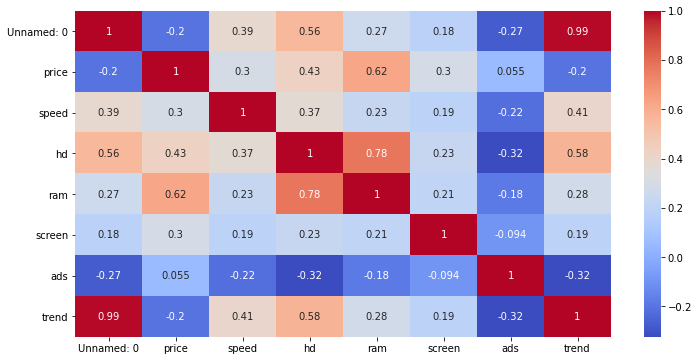

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

As we can from the heatmap above, all the Features are not corroleted with the Price column. So now I am bit worried because that will not help us get a good model. Lets try and see. First we have to do some Feature Engineering on the categorical Features : cd, multi and premium.

In [9]:
df['cd'].nunique()

2

In [10]:
df['multi'].nunique()

2

In [11]:
df['premium'].nunique()

2

as we can see we have 2 unique types for all three variables, so it's going to be easy to to transform the features to dummies.

In [13]:
df_final=pd.get_dummies(df.drop(['Unnamed: 0'],axis=1),drop_first=True)

In [14]:
df_final.head()

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1499,25,80,4,14,94,1,0,0,1
1,1795,33,85,2,14,94,1,0,0,1
2,1595,25,170,4,15,94,1,0,0,1
3,1849,25,170,8,14,94,1,0,0,0
4,3295,33,340,16,14,94,1,0,0,1


In [15]:
df_final.tail()

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
6254,1690,100,528,8,15,39,35,0,0,1
6255,2223,66,850,16,15,39,35,1,1,1
6256,2654,100,1200,24,15,39,35,1,0,1
6257,2195,100,850,16,15,39,35,1,0,1
6258,2490,100,850,16,17,39,35,1,0,1


Now our data are ready! lets apply our model which is going to be the Linear Regression because our Target variable 'ePrice'is continuous. Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable

In [16]:
X=df_final.iloc[:,1:10]
y=df_final['price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Creating and Training the Model:

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# fit
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)
y_pred

array([2122.83391003, 2781.89330525, 2024.17084297, ..., 2376.66097329,
       2107.2399389 , 2565.78202467])

In [21]:
# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

0.7540861281178491


Not bad, we are getting approx. 75% r-squared with all the variables. Let’s see how much we can get with lesser features.

Let’s now build a model using recursive feature elimination to select features. We’ll first start off with an arbitrary number of features, and then use the “statsmodels” library to build models using the shortlisted features (this is because sklearn doesn’t have adjusted r-squared but statsmodels has).

## Choosing the optimal number of features for Model building:

One way to choose the optimal number of features is to make a plot between number of features(n_features) vs adjusted r-squared, and then choose the best value of n_features.

The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [26]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select

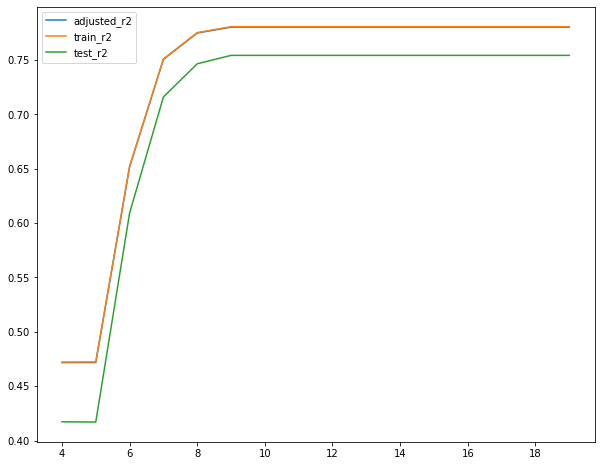

In [27]:
n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []
for n_features in range(4, 20):
# RFE with n features
    lm = LinearRegression()
# specify number of features
    rfe_n = RFE(lm, n_features)
# fit with n features
    rfe_n.fit(X_train, y_train)
# subset the features selected by rfe_6
    col_n = X_train.columns[rfe_n.support_]
# subsetting training data for 6 selected columns
    X_train_rfe_n = X_train[col_n]
# add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)
# fitting the model with 6 variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    
    # making predictions using rfe_15 sm model
    X_test_rfe_n = X_test[col_n]
# # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
# # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

Based on the plot, we can choose the number of features considering the r2_score we are looking for. Note that there are a few caveats in this approach, and there are more sophisticated techniques to choose the optimal number of features

- The values of r-squared and adjusted r-squared are computed based on the training set, though we must always look at metrics computed on the test set. For e.g. in this case, the test r2 actually goes with increasing n — this phenomenon is called ‘underfitting’, where the performance on training set is good because the model has in some way ‘memorised’ the dataset, and thus the performance on test set is worse.

- Thus, we can choose anything between 4 and 18 features, since beyond 9, the test r2 is constant; and at lesser than 7, the r2_score is too less.

- In fact, the test_r2 score increase from n=5 to n=9. It is thus wiser to choose a simpler model, and so let’s choose n=7.

## Final Model:

In [40]:
# RFE with n features
lm = LinearRegression()
n_features = 7
# specify number of features
rfe_n = RFE(lm, n_features)
# fit with n features
rfe_n.fit(X_train, y_train)
# subset the features selected by rfe_7
col_n = X_train.columns[rfe_n.support_]
# subsetting training data for 7 selected columns
X_train_rfe_n = X_train[col_n]
# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)
# fitting the model with 7 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)
# making predictions using rfe_15 sm model
X_test_rfe_n = X_test[col_n]
# # Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)
test_r2.append(r2_score(y_test, y_pred))
# summary
lm_n.summary()

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     2151.
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:33:10   Log-Likelihood:                -35512.
No. Observations:                5007   AIC:                         7.104e+04
Df Residuals:                    4999   BIC:                         7.109e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         380.4338     68.338      5.567      0.000     246.462     514.406
speed           9.5807      0.215     44.505      0.000       9.159      10.003
ram            69.9128      0.853     81.971      0.000      68.241      71.585
screen        128.8636      4.712     27.347      0.000     119.626     138.102
trend         -44.5480      0.627    -71.050      0.000     -45.777     -43.319
cd_yes        110.5998     10.987     10.066      0.000      89.060     132.140
multi_yes      77.3152     13.402      5.769      0.000      51.041     103.589
premium_yes  -526.9084     14.271    -36.921      0.000    -554.886    -498.931
==============================================================================
Omnibus:                     1051.261   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4163.600
Skew:                           0.992   Prob(JB):                         0.00
Kurtosis:                       7.003   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# results 
r2_score(y_test, y_pred)

0.7158344376370054

So the model has accuracy of 71.58% on test data which is good. There are other ways of model evaluation as well, let’s see those points.

## Final Model Evaluation:

Let’s now evaluate the model in terms of its assumptions. We should test that:
- 
- The error terms are normally distributed with mean approximately 0.

- There is little correlation between the predictors.

- Homoscedasticity, i.e. the ‘spread’ or ‘variance’ of the error term (y_true-y_pred) is constant.

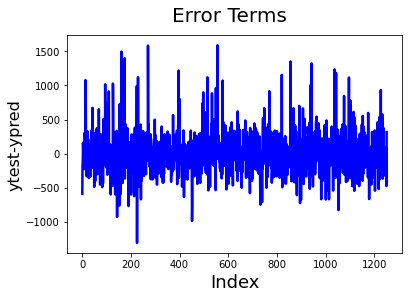

In [42]:
# Error terms
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

Plotting the error terms to understand the distribution.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


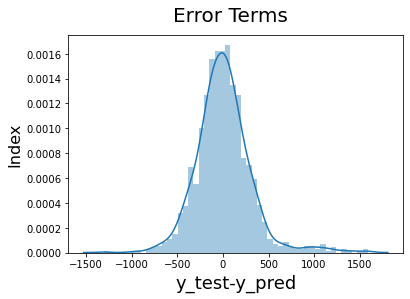

In [43]:
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

Now it may look like that the mean is not 0, though compared to the scale